In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

seed_num=42

wine_file = '../../../data/wine_quality/raw/winequality-red.csv'
#df = pd.read_csv(wine_file, delimiter=';') # Load the data
df = pd.read_csv(wine_file, delimiter=';')

In [3]:
X=df.drop("quality", axis=1)

In [4]:
y=df.quality

In [5]:
# interpretml EBM
from interpret import show
from interpret.data import Marginal
from interpret.glassbox import ExplainableBoostingRegressor, LinearRegression, RegressionTree

marginal = Marginal().explain_data(X, y, name = 'Train Data')
# show(marginal)

In [6]:
# Explainable boosting regressor
ebm = ExplainableBoostingRegressor(random_state=seed_num)
ebm.fit(X, y)

# ebm global
ebm_global = ebm.explain_global(name = 'EBM')
# show(ebm_global)

In [7]:
import utils

global_df=utils.tabularize_global_explanation(X, ebm)

In [8]:
local_df=utils.tabularize_local_explanation(X[:10],y[:10], ebm)

# Altair test

In [122]:
import altair as alt

In [9]:
vis_df=local_df[[col for col in local_df.columns if "scores" in col]]

vis_df=pd.DataFrame(vis_df.iloc[0])

vis_df.columns=["contribution"]

vis_df=vis_df.sort_values("contribution", ascending=False)

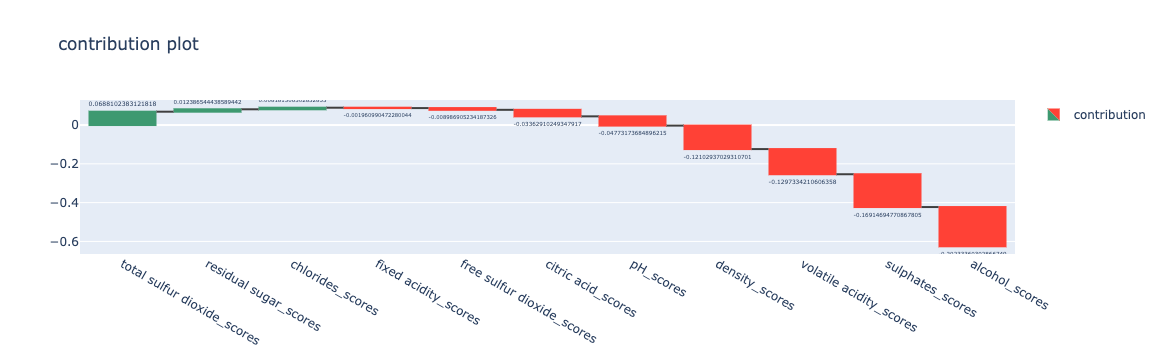

In [10]:

import plotly.graph_objects as go

fig = go.Figure(go.Waterfall(
#    base=intercept,
    name = "contribution", orientation = "v",
#     measure = ["relative", "relative", "total", "relative", "relative", "total"],
    x = vis_df.index,
    textposition = "outside",
    text = vis_df.contribution,
    y = vis_df.contribution,
    connector = {"line":{"color":"rgb(63, 63, 63)"}},
))

fig.update_layout(
        title = "contribution plot",
        showlegend = True
)

fig.show()

In [57]:
"""
Waterfall Chart
-----------------
This example shows how to make a simple waterfall chart.
"""
# category: bar charts
import altair as alt
import pandas as pd
from altair import datum

data = pd.DataFrame([
    {"Fixed costs": 5,
     "Advertising costs": 3,
     "Other costs": 2},
])

In [60]:
data=vis_df.T.copy()

In [39]:
vis_df.T

total sulfur dioxide_scores  residual sugar_scores  \
contribution                      0.06881               0.012387   

              chlorides_scores  fixed acidity_scores  \
contribution          0.008181             -0.001961   

              free sulfur dioxide_scores  citric acid_scores  pH_scores  \
contribution                   -0.008987           -0.033629  -0.047732   

              density_scores  volatile acidity_scores  sulphates_scores  \
contribution       -0.121029                -0.129733         -0.169147   

              alcohol_scores  
contribution       -0.202334

In [53]:
data

Fixed costs  Advertising costs  Other costs
0            2                  5            3

In [61]:
data_waterfall = data.melt()

data_waterfall['start'] = data_waterfall.value.cumsum().shift().fillna(0)
data_waterfall['end'] = data_waterfall.value.cumsum()
data_waterfall.drop(['value'], axis=1, inplace=True)

# data_waterfall = data_waterfall.append(
#                     {'variable': 'Total costs',
#                      'start': 0,
#                      'end': max(data_waterfall['end'])
#                      }, ignore_index=True)

In [62]:
data_waterfall

variable     start       end
0   total sulfur dioxide_scores  0.000000  0.068810
1         residual sugar_scores  0.068810  0.081197
2              chlorides_scores  0.081197  0.089378
3          fixed acidity_scores  0.089378  0.087417
4    free sulfur dioxide_scores  0.087417  0.078430
5            citric acid_scores  0.078430  0.044801
6                     pH_scores  0.044801 -0.002931
7                density_scores -0.002931 -0.123960
8       volatile acidity_scores -0.123960 -0.253693
9              sulphates_scores -0.253693 -0.422840
10               alcohol_scores -0.422840 -0.625174

In [59]:
data_waterfall

variable  start  end
0        Fixed costs    0.0    5
1  Advertising costs    5.0    8
2        Other costs    8.0   10

In [65]:
waterfall_bars = alt.Chart(data_waterfall).mark_bar(size=10).encode(
    y2=alt.Y2('end:Q'),
    y=alt.Y('start:Q', axis=alt.Axis(grid=False)),
    x=alt.X('variable:N')
)

In [66]:
waterfall_bars

alt.Chart(...)

In [56]:
ticks = alt.Chart(data_waterfall).mark_tick(
    color="grey",
    size=150,
    xOffset=100
).encode(
    y='end:Q',
    x='variable:N'
)#.transform_filter(
 #   datum.variable != "Total costs"
#)

(waterfall_bars+ticks).configure_axisX(
    labelAngle=0
).properties(
    width=500
)

alt.LayerChart(...)